In [1]:
import sys
import os.path
from scipy import optimize
import numpy as np
from IPython.display import HTML, display
import matplotlib.pyplot as plt
import pandas as pd
import nbformat as nbf


def display_table(data):
    html = "<table>"
    for row in data:
        html += "<tr>"
        for field in row:
            html += "<td><h4>%s</h4></td>" % field
        html += "</tr>"
    html += "</table>"
    display(HTML(html))

# $\beta$ sugárzás abszorbciójának mérése
Ez egy updatelt verzió, mert a tegnapi csúnya lett ...

## A Háttér mérése
![A mérési összeállítás](osszeall.png)
* A mérés összeállítása  a fenti ábrán látható. Mivel a szcintillációs detektor a sugárforrás nélkül is érzékelhet beütéseket, először ezt mértük le.
* Mivel a mérés sztochasztikus jellegű, mindent 3 alkalommal mértünk
* Az itt kapott <i> offset </i> értéket minden további mérési eredményből levontuk

In [2]:
hatter = np.array([3, 3, 3])
offset = 3
data = pd.DataFrame(hatter, columns=['A mért beütések'])
data.to_latex(index=False, column_format='c|c', float_format="{:,1f}".format, decimal=',')

C:\Users\schba\AppData\Local\Temp\ipykernel_13324\2783497319.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  data.to_latex(index=False, column_format='c|c', float_format="{:,1f}".format, decimal=',')


'\\begin{tabular}{c|c}\n\\toprule\n A mért beütések \\\\\n\\midrule\n               3 \\\\\n               3 \\\\\n               3 \\\\\n\\bottomrule\n\\end{tabular}\n'

## Ellenőrző mérés
##### Behelyeztük a <i> Stroncium </i> $^{90}_{38}\mathrm{Sr}$ sugárforrást a mérési berendezésbe, majd az előre beállított mérési paraméterekkel dolgoztunk:
* A mérés ideje: $T=20~$s
* A diszkriminátor feszültség: 200 mV
* Erősítés: 2

Ekkor a $\beta$ sugárzás útjában csak az azt a detektortól elválasztó levegőréteg van

In [3]:
be0 = np.array([54898, 55319, 55044])-offset
print(be0.std())
data = pd.DataFrame(be0, columns=['A mért beütések'])
data.style.to_latex()
(1.293*4+1.2)/4

174.5413036122587


1.593

## Alumíniumlapkák behelyezése
Ezután sorban helyeztünk be egyre vastagabb alumínium lapkákat a forrás fölé, és mértük a beütésszámokat minden esetben

In [4]:
x = np.array([0.0, 0.085, 0.14, 0.20, 0.24, 0.30, 0.32, 0.49, 0.82, 0.86, 0.94, 1.01, 1.10, 1.15])
be1 = np.array([42090, 41473, 41471])
be2 = np.array([36890, 36673, 36593])
be3 = np.array([32036, 32143, 32089])
be4 = np.array([29967, 29702, 29925])
be5 = np.array([26312, 26344, 26201])
be6 = np.array([25388, 25168, 25228])
be7 = np.array([19665, 19424, 19638])
be8 = np.array([12734, 12716, 12660])
be9 = np.array([12225, 12043, 12217])
be10 = np.array([11265, 10970, 10988])
be11 = np.array([10379, 10260, 10510])
be12 = np.array([9465, 9452, 9570])
be13 = np.array([9152, 8986, 8863])
be = np.array([be0, be1, be2, be3, be4, be5, be6, be7, be8, be9, be10, be11, be12, be13])-offset
beteljes = np.append(be, np.around(be.mean(axis=1).reshape(14, 1), 2), axis=1)
beteljes = np.append(x.reshape(14, 1), beteljes, axis=1)
data = pd.DataFrame(beteljes, columns=["Lemez vastagság (mm)", r"N_1", r"N_2", r"N_3", "Átlag"])
print(data)
data.to_latex(index=False, column_format='c|c c c c', decimal=',')
print(np.std(beteljes[:,1:3], axis=1))

    Lemez vastagság (mm)      N_1      N_2      N_3     Átlag
0                  0.000  54892.0  55313.0  55038.0  55081.00
1                  0.085  42087.0  41470.0  41468.0  41675.00
2                  0.140  36887.0  36670.0  36590.0  36715.67
3                  0.200  32033.0  32140.0  32086.0  32086.33
4                  0.240  29964.0  29699.0  29922.0  29861.67
5                  0.300  26309.0  26341.0  26198.0  26282.67
6                  0.320  25385.0  25165.0  25225.0  25258.33
7                  0.490  19662.0  19421.0  19635.0  19572.67
8                  0.820  12731.0  12713.0  12657.0  12700.33
9                  0.860  12222.0  12040.0  12214.0  12158.67
10                 0.940  11262.0  10967.0  10985.0  11071.33
11                 1.010  10376.0  10257.0  10507.0  10380.00
12                 1.100   9462.0   9449.0   9567.0   9492.67
13                 1.150   9149.0   8983.0   8860.0   8997.33
[210.5 308.5 108.5  53.5 132.5  16.  110.  120.5   9.   91.  147.5  59

C:\Users\schba\AppData\Local\Temp\ipykernel_13324\3076684518.py:20: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  data.to_latex(index=False, column_format='c|c c c c', decimal=',')


[-3.76937827e-03  1.03001522e+01]
7.545852274751659e-05 0.022651117374498604
2.9905135096377626


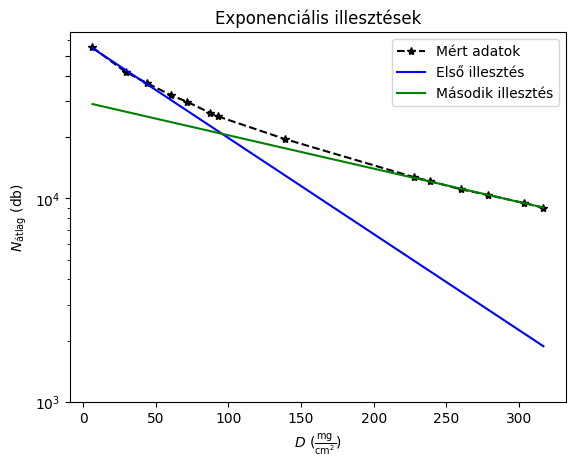

In [5]:
roal = 2.70 # g/cm^3
x = np.array([0.0, 0.085, 0.14, 0.20, 0.24, 0.30, 0.32, 0.49, 0.82, 0.86, 0.94, 1.01, 1.10, 1.15])
x = x/10*roal*1000+6.372
# fit1 = np.poly1d(np.polyfit(x[0:2], np.log(beteljes[0:2,-1]), 1))
# fit2 = np.poly1d(np.polyfit(x[10:], np.log(beteljes[10:,-1]), 1))
[opt1, cov1] = optimize.curve_fit(lambda t, m, c: m*t+c, x[0:3], np.log(beteljes[0:3,-1]))
[opt2, cov2] = optimize.curve_fit(lambda t, m, c: m*t+c, x[11:], np.log(beteljes[11:,-1]))

print(opt2)
print(np.sqrt(cov2[0,0]), np.sqrt(cov2[1,1]))
print(np.exp(np.sqrt(1.2)))

fig, ax = plt.subplots()
# ax.semilogy(x/10*roal*1000+6.372, beteljes[:,-1], 'k--+')
ax.semilogy(x, beteljes[:,-1], 'k--*', label='Mért adatok')
ax.semilogy(x, np.exp(opt1[0]*x+opt1[1]), 'b-', label='Első illesztés')
ax.semilogy(x, np.exp(opt2[0]*x+opt2[1]), 'g-', label='Második illesztés')
ax.set_yticks((1000,10000,20000,30000,40000,50000))
ax.set_xlabel(r"$D$ $(\mathrm{\frac{mg}{cm^2}})$")
ax.set_ylabel(r"$N_{\mathrm{átlag}}$ (db)")
ax.set_title("Exponenciális illesztések")
ax.legend()
plt.savefig('1log2.pdf', format='pdf', dpi=1000, bbox_inches='tight')

[9.02110052e-01 1.55487192e+12]
[[1.05580754e+00            nan]
 [           nan 1.34062433e+06]]
35.460626922746954 27733.760385194153 272.4980869565213


C:\Users\schba\AppData\Local\Temp\ipykernel_13324\2273318647.py:7: RuntimeWarning: invalid value encountered in sqrt
  print(np.exp(np.sqrt(cov)))


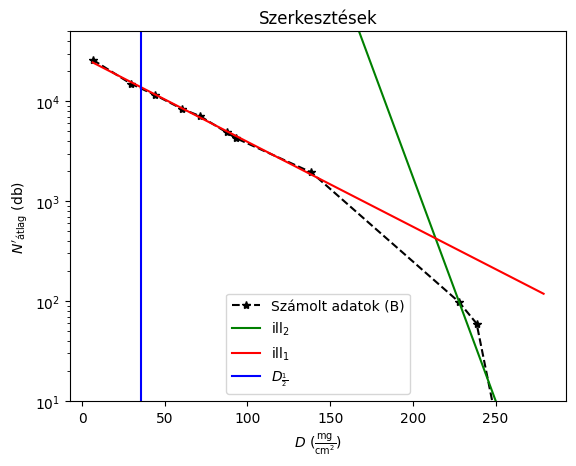

In [10]:
B = beteljes[:12,-1]-np.exp(opt2[0]*x[:12]+opt2[1])
B[B<1] = 1
x2 = x[:12]
[fit, cov] = optimize.curve_fit(lambda t, m, c: m*t+c, x2[-3:], np.log(B[-3:]))
[fit2, cov2] = optimize.curve_fit(lambda t, m, c: m*t+c, x2[:8], np.log(B[:8]))
print(np.exp(fit))
print(np.exp(np.sqrt(cov)))
x12 = -np.log(2)/fit2[0]
N0 = np.exp(fit2[1])
R = -fit[1]/fit[0]
print(x12, N0, R)

fig, ax = plt.subplots()
ax.semilogy(x2, B, 'k--*', label='Számolt adatok (B)')
ax.semilogy(x2, np.exp(fit[0]*x2+fit[1]), 'g-', label='ill$_2$')
ax.semilogy(x2, np.exp(fit2[0]*x2+fit2[1]), 'r-', label='ill$_1$')
ax.axvline(x=x12, color='b', label = r'$D_{\frac{1}{2}}$')
ax.set_xlabel(r"$D$ $(\mathrm{\frac{mg}{cm^2}})$")
ax.set_ylabel(r"$N'_{\mathrm{átlag}}$ (db)")
ax.set_ylim((10,50000))
ax.set_title('Szerkesztések')
ax.legend()
plt.savefig('1B2.pdf', format='pdf', dpi=1000, bbox_inches='tight')

0.7477315181916226
3.1565726199369976e-14
-0.01954695223155549


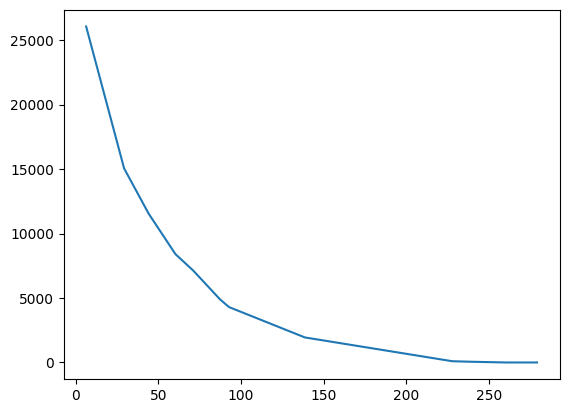

In [15]:
plt.plot(x2, B)
Ebmax = (R/1000/0.407)**(1/1.38)
print(Ebmax)
print(17*(Ebmax*1.6e-19*1e6)**1.14)
print(fit2[0])

## Fékezési röntgensugárzás
Ezután a legvastagabb ($x = 1,15~$mm) alumíniumlapkát benthagyva ólomlemezeket ($x_{\mathrm{ólom}}\approx 2~$mm) helyeztünk az alumínium fölé, ezzel jól leárnyékolva az itt is jelen lévő fékezési sugárzást. Így is megmértük a beütésszámokat.

In [21]:
d_olom = 2 #mm
db = np.array([1, 2, 3]) #db
n_olom = np.array([[21, 20, 20],[13, 13, 16], [14, 14, 12]])-offset
olom = np.append(db.reshape(3,1), n_olom, axis=1)
data = pd.DataFrame(olom, columns=["Ólomkorongok száma", r"N_1", r"N_2", r"N_3"])
data.to_latex(index=False, column_format='c|c c c c', decimal=',')
print(np.std(n_olom,axis=1))

[0.47140452 1.41421356 0.94280904]


C:\Users\schba\AppData\Local\Temp\ipykernel_13324\1572176377.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  data.to_latex(index=False, column_format='c|c c c c', decimal=',')
